# Problem Statement

## Our group came across this data set and we want to determine which of the variable is most accurate in detecting the likelihood of one getting diagnosed with diabetes.

In [209]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import the dataset

In [210]:
diabetes = pd.read_csv('Diabetes Simple Diagnosis.csv')
diabetes.head()

,Unnamed: 0,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,0,80,Female,25,0,140,6.6,0,0
1,1,54,Female,27,0,80,6.6,0,0
2,2,28,Male,27,0,158,5.7,0,0
3,3,36,Female,23,0,155,5.0,1,0
4,4,76,Male,20,1,155,4.8,1,0


In [211]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88380 entries, 0 to 88379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88380 non-null  int64  
 1   Age          88380 non-null  int64  
 2   Gender       88380 non-null  object 
 3   BMI          88380 non-null  int64  
 4   High_BP      88380 non-null  int64  
 5   FBS          88380 non-null  int64  
 6   HbA1c_level  88380 non-null  float64
 7   Smoking      88380 non-null  int64  
 8   Diagnosis    88380 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 6.1+ MB


### Remove Unnamed column as it is just index (irrelevant)

In [212]:
variable_to_remove = 'Unnamed: 0'
diabetes = diabetes.drop(columns=[variable_to_remove])
diabetes.head()

,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,80,Female,25,0,140,6.6,0,0
1,54,Female,27,0,80,6.6,0,0
2,28,Male,27,0,158,5.7,0,0
3,36,Female,23,0,155,5.0,1,0
4,76,Male,20,1,155,4.8,1,0


### Extract 50000 data from our dataset & split into train and test set

In [213]:
# Randomly sample 50000 data points from the DataFrame
sampled_data = diabetes.sample(n=50000, random_state=42)  # You can change the random_state for different random samples

# Display the sampled data
print(sampled_data)

       Age  Gender  BMI  High_BP  FBS  HbA1c_level  Smoking  Diagnosis
42309   22    Male   28        0  159          6.2        0          0
71265   23  Female   39        0  145          4.0        0          0
73621   32    Male   28        0  100          5.7        1          0
5832    78  Female   27        0   80          6.0        0          0
80299   68  Female   27        1  155          4.0        0          0
...    ...     ...  ...      ...  ...          ...      ...        ...
12903   75    Male   27        1  145          5.8        0          0
80271   12    Male   17        0  145          6.5        0          0
83292   52    Male   28        0  159          3.5        0          0
46690   21  Female   33        0  100          5.7        0          0
27945   10  Female   27        0  140          5.8        0          0

[50000 rows x 8 columns]


### Exploratory Data Analysis

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


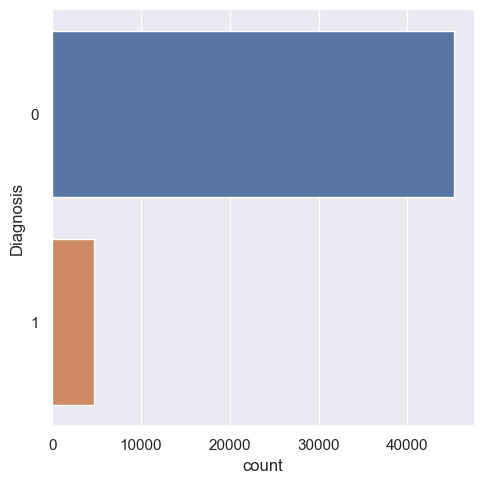

In [214]:
sb.catplot(y = 'Diagnosis', data = sampled_data, kind = "count")

In [215]:
countG, countB = sampled_data['Diagnosis'].value_counts()
print("Ratio of classes is False : True = ", countG, ":", countB)

Ratio of classes is False : True =  45248 : 4752


Alright. We see a large class imbalance in the Response variable.
Unless we fix this, Classification models may face some problems.

Anyway, let's go ahead as it is, for the time being. May be later.

Quickly check out the Numeric and Categorical predictors separately, as the standard functions behave differently for them.

In [216]:
# Numeric Predictors
sampled_data[['Age','BMI','FBS','HbA1c_level']].describe()

,Age,BMI,FBS,HbA1c_level
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,42.219060,27.066500,138.679640,5.552418
std,22.290526,6.945309,41.414576,1.083083
min,0.000000,10.000000,80.000000,3.500000
25%,24.000000,23.000000,100.000000,4.800000
50%,43.000000,27.000000,140.000000,5.800000
75%,60.000000,30.000000,159.000000,6.200000
max,80.000000,95.000000,300.000000,12.000000


In [217]:
# Categorical Predictors
sampled_data['High_BP'] = sampled_data['High_BP'].astype('category',copy=False)
sampled_data['Smoking'] = sampled_data['Smoking'].astype('category',copy=False)
# sampled_data['Diagnosis'] = sampled_data['Diagnosis'].astype('category',copy=False)
sampled_data[['Gender','High_BP','Smoking']].describe()

,Gender,High_BP,Smoking
count,50000,50000,50000
unique,3,2,2
top,Female,0,0
freq,29167,45780,34189


### Removing the third option for gender since it is redundant 

In [218]:
gender = sampled_data[["Gender"]]

thirdOption = gender[gender['Gender'] == 'Other']     #identify rows with 'Other'

In [219]:
thirdOption

,Gender
60927,Other
12424,Other
64744,Other
22491,Other
30557,Other
68188,Other
18188,Other
33234,Other
14517,Other
68545,Other


In [220]:
indexremoving = thirdOption.index      #just interested in the index

In [221]:
sampled_data = sampled_data.drop(indexremoving)    #using drop to remove

In [222]:
sampled_data[['Gender','High_BP','Smoking']].describe()

,Gender,High_BP,Smoking
count,49990,49990,49990
unique,2,2,2
top,Female,0,0
freq,29167,45770,34184


### Visualization part to check all the variables one by one for outliers

<Axes: xlabel='Age'>

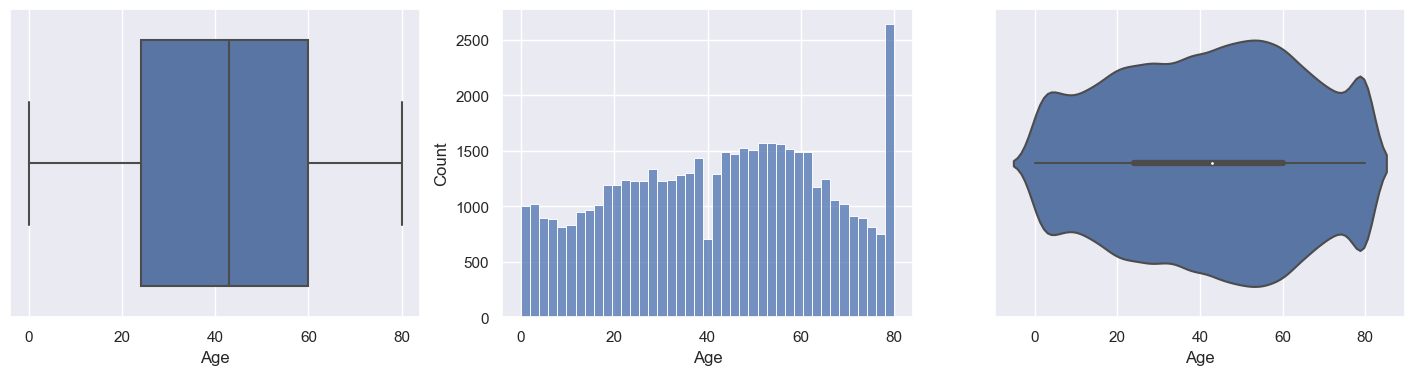

In [223]:
# Age of patient
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(x = sampled_data['Age'], orient = "h", ax = axes[0])
sb.histplot(x = sampled_data['Age'], ax = axes[1])
sb.violinplot(x = sampled_data['Age'], ax = axes[2])

<Axes: xlabel='BMI'>

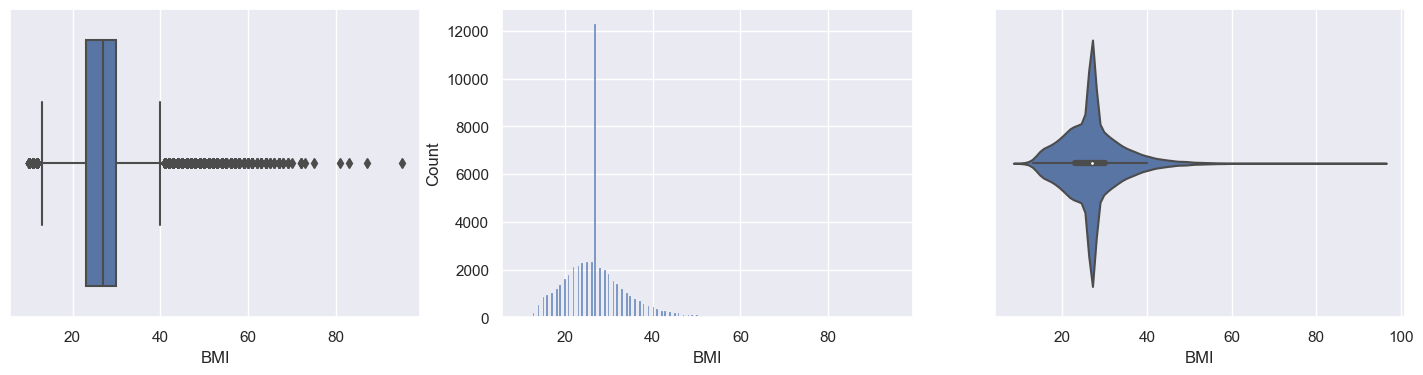

In [224]:
# BMI of patient
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(x = sampled_data['BMI'], orient = "h", ax = axes[0])
sb.histplot(x = sampled_data['BMI'], ax = axes[1])
sb.violinplot(x = sampled_data['BMI'], ax = axes[2])

<Axes: xlabel='FBS'>

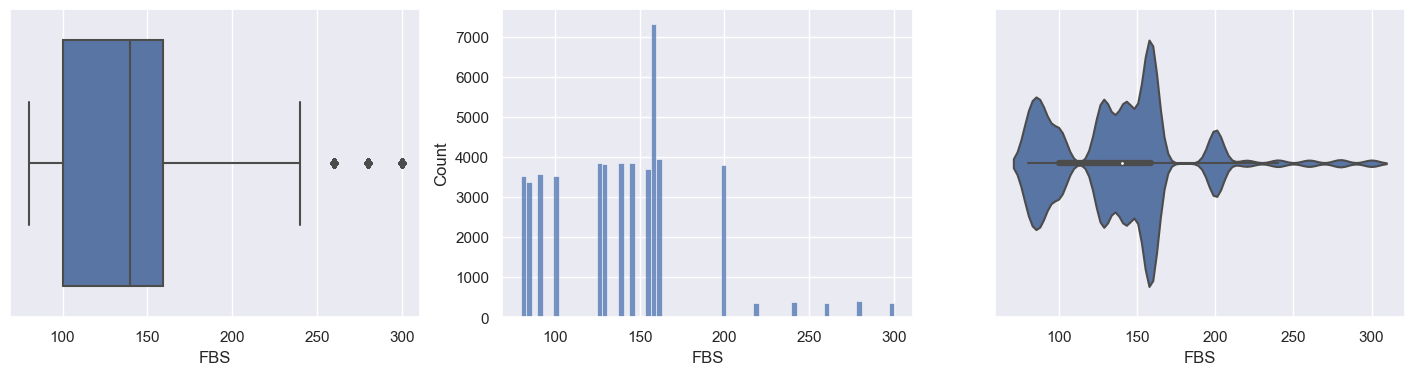

In [225]:
# FBS of patient
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(x = sampled_data['FBS'], orient = "h", ax = axes[0])
sb.histplot(x = sampled_data['FBS'], ax = axes[1])
sb.violinplot(x = sampled_data['FBS'], ax = axes[2])

<Axes: xlabel='HbA1c_level'>

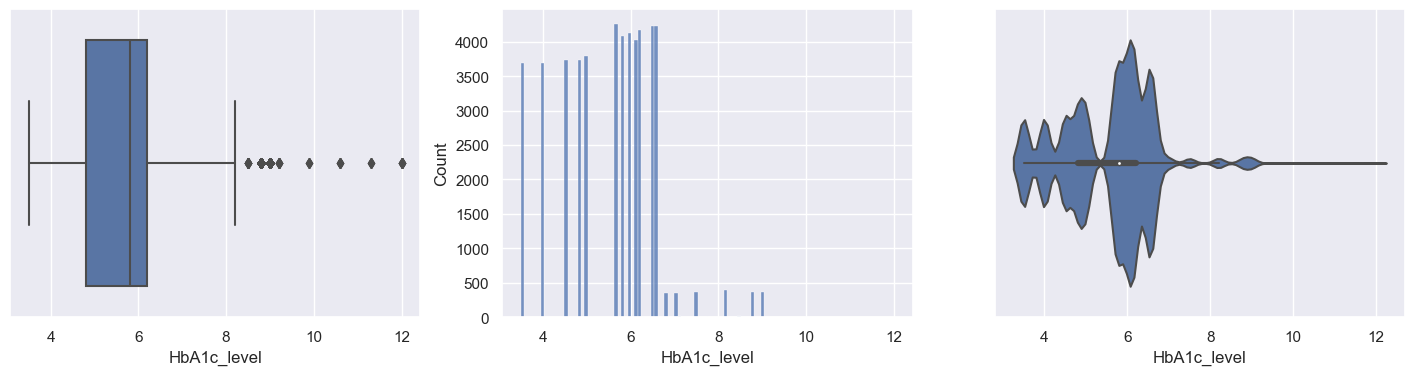

In [226]:
# HbA1c_level of patient
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(x = sampled_data['HbA1c_level'], orient = "h", ax = axes[0])
sb.histplot(x = sampled_data['HbA1c_level'], ax = axes[1])
sb.violinplot(x = sampled_data['HbA1c_level'], ax = axes[2])

### Comments:
#### Histogram analysis
#### Identifying outliers - Skewness of histogram signifies direction of outliers (impact linear regression and decision tree)
#### BMI, FBS, budget and HbA1c_level is significantly right skewed -> signifies large number of outliers that are greater than the mode

#### Only Age has a unimodel (normal distribution) -> no outliers

### Gender by itself

In [227]:
CatData = sampled_data[['Gender','High_BP','Smoking','Diagnosis']].copy()
CatData
CatData.describe()

,Diagnosis
count,49990.000000
mean,0.095059
std,0.293299
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


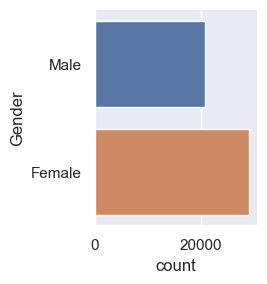

In [228]:
#Gender univariate analysis
sb.catplot(data = CatData, y = 'Gender', kind = 'count', height = 3)


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


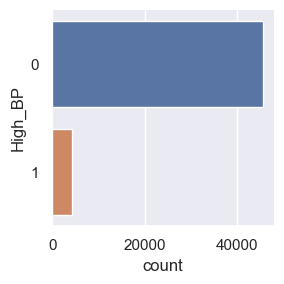

In [229]:
#High_BP univariate analysis
sb.catplot(data = CatData, y = 'High_BP', kind = 'count', height = 3)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


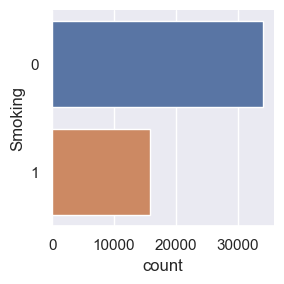

In [230]:
#Smoking univariate analysis
sb.catplot(data = CatData, y = 'Smoking', kind = 'count', height = 3)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


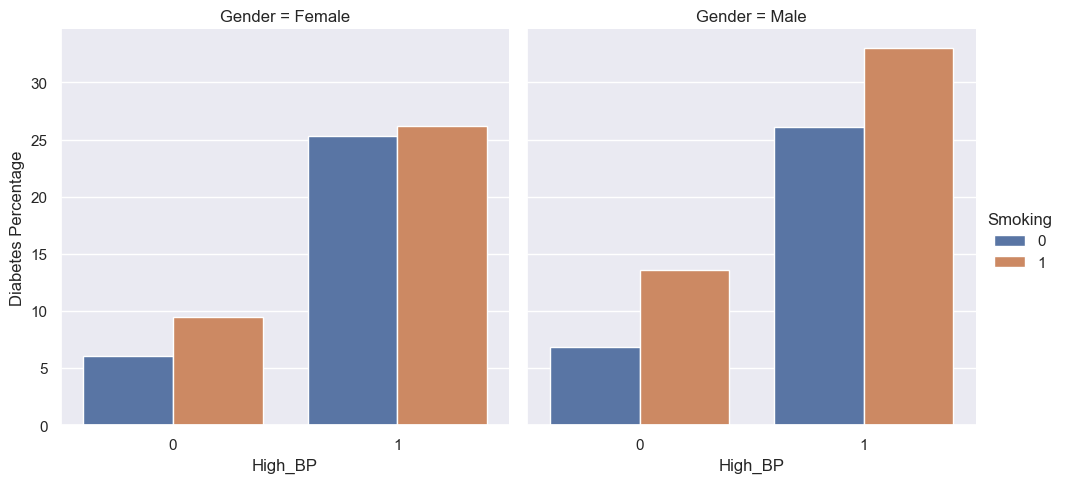

In [231]:
import pandas as pd
import seaborn as sns

# Assuming you have already imported sampled_data and created CatData DataFrame

# First, let's filter the data based on gender, High_BP, Smoking, and Diagnosis
filtered_data = CatData.groupby(['Gender', 'High_BP', 'Smoking', 'Diagnosis']).size().reset_index(name='count')

# Now, let's calculate the percentage of each group
filtered_data['percentage'] = (filtered_data['count'] / filtered_data.groupby(['Gender', 'High_BP', 'Smoking'])['count'].transform('sum')) * 100

# Pivot the data for visualization
pivot_data = filtered_data.pivot_table(index=['Gender', 'High_BP', 'Smoking'], columns='Diagnosis', values='percentage', fill_value=0).reset_index()

# Rename the columns for better understanding
pivot_data.rename(columns={0: 'No Diabetes Percentage', 1: 'Diabetes Percentage'}, inplace=True)

# Visualize the pivot table
sns.catplot(x='High_BP', y='Diabetes Percentage', hue='Smoking', col='Gender', kind='bar', data=pivot_data)

## From the bar, we found out that Male that have high blood pressure and smoke has the highest diabetes percentage which is around 36%. On the other hand, the lowest group to get diabetes are females that have low blood pressure and do not smoke which is around 6%. 
## We concluded that:
### 1. Those with high blood pressure have higher probability to get diabetes.
### 2. Diabetes percentage in male is higher than female.
### 3. Those who smoke have higher probability to get diabetes.

### Removing outliers

### BMI

In [232]:
# Extract the two variables for simplicity
targetData_BMI = sampled_data[['BMI', 'Diagnosis']].copy()

In [233]:
# Calculate the quartiles
Q1 = targetData_BMI.quantile(0.25)
Q3 = targetData_BMI.quantile(0.75)

# Rule to identify outliers
rule = ((targetData_BMI < (Q1 - 1.5 * (Q3 - Q1))) | (targetData_BMI > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,BMI,Diagnosis
42309,False,False
71265,False,False
73621,False,False
5832,False,False
80299,False,False
...,...,...
12903,False,False
80271,False,False
83292,False,False
46690,False,False


In [234]:
outliers = rule.any(axis = 1)
outliers.value_counts()

False    43454
True      6536
Name: count, dtype: int64

In [235]:
outlierindices = outliers.index[outliers == True]
outlierindices

Index([42183, 34949, 18221, 31465,  8240, 23273,  8617, 53423,  4779, 46106,
       ...
       62658, 30581, 46003, 66410, 67361, 15411, 62343, 42265, 37539, 44702],
      dtype='int64', length=6536)

In [236]:
# Removing outliers
targetData_BMI.drop(axis = 0,               
                index = outlierindices, 
                inplace = True)

targetData_BMI

,BMI,Diagnosis
42309,28,0
71265,39,0
73621,28,0
5832,27,0
80299,27,0
...,...,...
12903,27,0
80271,17,0
83292,28,0
46690,33,0


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Diagnosis
0    45238
1     4752
Name: count, dtype: int64


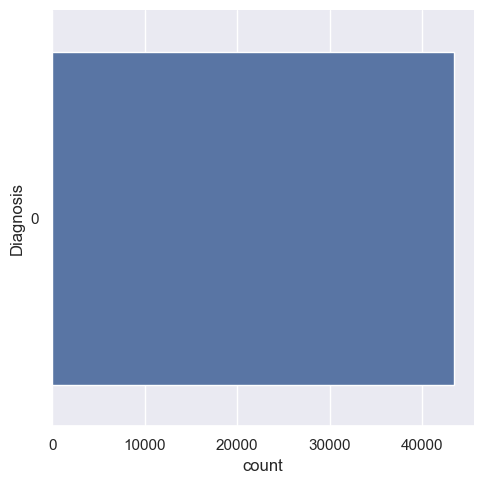

In [237]:
# Plotting the catplot
sb.catplot(y="Diagnosis", data=targetData_BMI, kind="count")

# Getting the numerical count for each diagnosis
diagnosis_counts = sampled_data['Diagnosis'].value_counts()
print(diagnosis_counts)

### From the catplot, we can see that there are no positive cases of diabetes left in the dataset after removing the outliers for BMI.

### FBS

In [238]:
# Extract the two variables for simplicity
targetData_FBS = sampled_data[['FBS', 'Diagnosis']].copy()

In [239]:
# Calculate the quartiles
Q1 = targetData_FBS.quantile(0.25)
Q3 = targetData_FBS.quantile(0.75)

# Rule to identify outliers
rule = ((targetData_FBS < (Q1 - 1.5 * (Q3 - Q1))) | (targetData_FBS > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,FBS,Diagnosis
42309,False,False
71265,False,False
73621,False,False
5832,False,False
80299,False,False
...,...,...
12903,False,False
80271,False,False
83292,False,False
46690,False,False


In [240]:
outliers = rule.any(axis = 1)
outliers.value_counts()

False    45229
True      4761
Name: count, dtype: int64

In [241]:
outlierindices = outliers.index[outliers == True]
outlierindices

Index([34949, 18221, 31465,  8240, 23273,  8617, 53423, 17605, 26637, 36811,
       ...
       63820, 58463, 86314, 46498, 30581, 66410, 15411, 62343, 42265, 44702],
      dtype='int64', length=4761)

In [242]:
# Removing outliers
targetData_FBS.drop(axis = 0,               
                index = outlierindices, 
                inplace = True)

targetData_FBS

,FBS,Diagnosis
42309,159,0
71265,145,0
73621,100,0
5832,80,0
80299,155,0
...,...,...
12903,145,0
80271,145,0
83292,159,0
46690,100,0


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Diagnosis
0    45238
1     4752
Name: count, dtype: int64


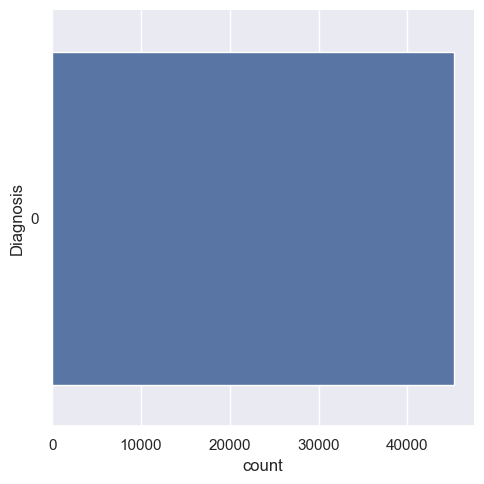

In [243]:
# Plotting the catplot
sb.catplot(y="Diagnosis", data=targetData_FBS, kind="count")

# Getting the numerical count for each diagnosis
diagnosis_counts = sampled_data['Diagnosis'].value_counts()
print(diagnosis_counts)

### From the catplot, we can see that there are no positive cases of diabetes left in the dataset after removing the outliers for FBS.

### HbA1c_level

In [244]:
# Extract the two variables for simplicity
targetData_Hb = sampled_data[['HbA1c_level', 'Diagnosis']].copy()

In [245]:
# Calculate the quartiles
Q1 = targetData_Hb.quantile(0.25)
Q3 = targetData_Hb.quantile(0.75)

# Rule to identify outliers
rule = ((targetData_Hb < (Q1 - 1.5 * (Q3 - Q1))) | (targetData_Hb > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,HbA1c_level,Diagnosis
42309,False,False
71265,False,False
73621,False,False
5832,False,False
80299,False,False
...,...,...
12903,False,False
80271,False,False
83292,False,False
46690,False,False


In [246]:
outliers = rule.any(axis = 1)
outliers.value_counts()

False    45211
True      4779
Name: count, dtype: int64

In [247]:
outlierindices = outliers.index[outliers == True]
outlierindices

Index([34949, 18221, 31465,  8240, 23273,  8617, 53423, 17605, 26637, 36811,
       ...
       63820, 58463, 86314, 46498, 30581, 66410, 15411, 62343, 42265, 44702],
      dtype='int64', length=4779)

In [248]:
# Removing outliers
targetData_Hb.drop(axis = 0,               
                index = outlierindices, 
                inplace = True)

targetData_Hb

,HbA1c_level,Diagnosis
42309,6.2,0
71265,4.0,0
73621,5.7,0
5832,6.0,0
80299,4.0,0
...,...,...
12903,5.8,0
80271,6.5,0
83292,3.5,0
46690,5.7,0


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Diagnosis
0    45238
1     4752
Name: count, dtype: int64


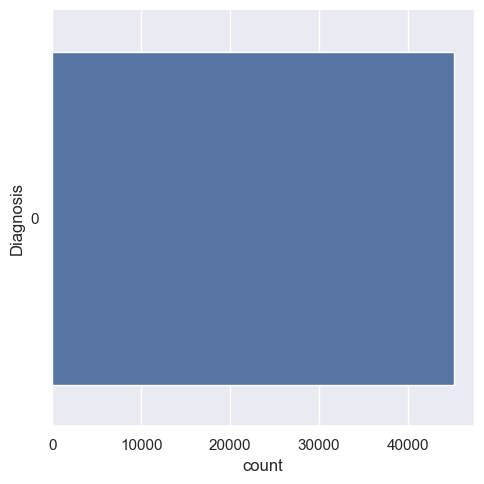

In [249]:
# Plotting the catplot
sb.catplot(y="Diagnosis", data=targetData_Hb, kind="count")

# Getting the numerical count for each diagnosis
diagnosis_counts = sampled_data['Diagnosis'].value_counts()
print(diagnosis_counts)

### From the catplot, we can see that there are no positive cases of diabetes left in the dataset after removing the outliers for HbA1c_level.

### We decided not to remove the outliers for each variable as all those who tested positive for diabetes will be excluded from the dataset. Since our aim is to understand how the different variables affect the diagnosis of diabetes, it wouldn't make sense to remove the outliers as there will be no positive cases of diabetes left in the dataset. Hence, we conclude that the outliers for Age, BMI, FBS and HbA1c_level are needed in our dataset for our analysis of their correlation with diabetes. 

# Predicting dianosis using numeric variables one by one

# Uni-variate classification

## Age 

[Text(0.5, 0.8333333333333334, 'Age <= 53.5\ngini = 0.172\nsamples = 37492\nvalue = [33938, 3554]\nclass = False'),
 Text(0.25, 0.5, 'Age <= 38.5\ngini = 0.077\nsamples = 24560\nvalue = [23571, 989]\nclass = False'),
 Text(0.125, 0.16666666666666666, 'gini = 0.033\nsamples = 16254\nvalue = [15985, 269]\nclass = False'),
 Text(0.375, 0.16666666666666666, 'gini = 0.158\nsamples = 8306\nvalue = [7586, 720]\nclass = False'),
 Text(0.75, 0.5, 'Age <= 64.5\ngini = 0.318\nsamples = 12932\nvalue = [10367, 2565]\nclass = False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.274\nsamples = 5927\nvalue = [4957, 970]\nclass = False'),
 Text(0.875, 0.16666666666666666, 'gini = 0.352\nsamples = 7005\nvalue = [5410, 1595]\nclass = False')]

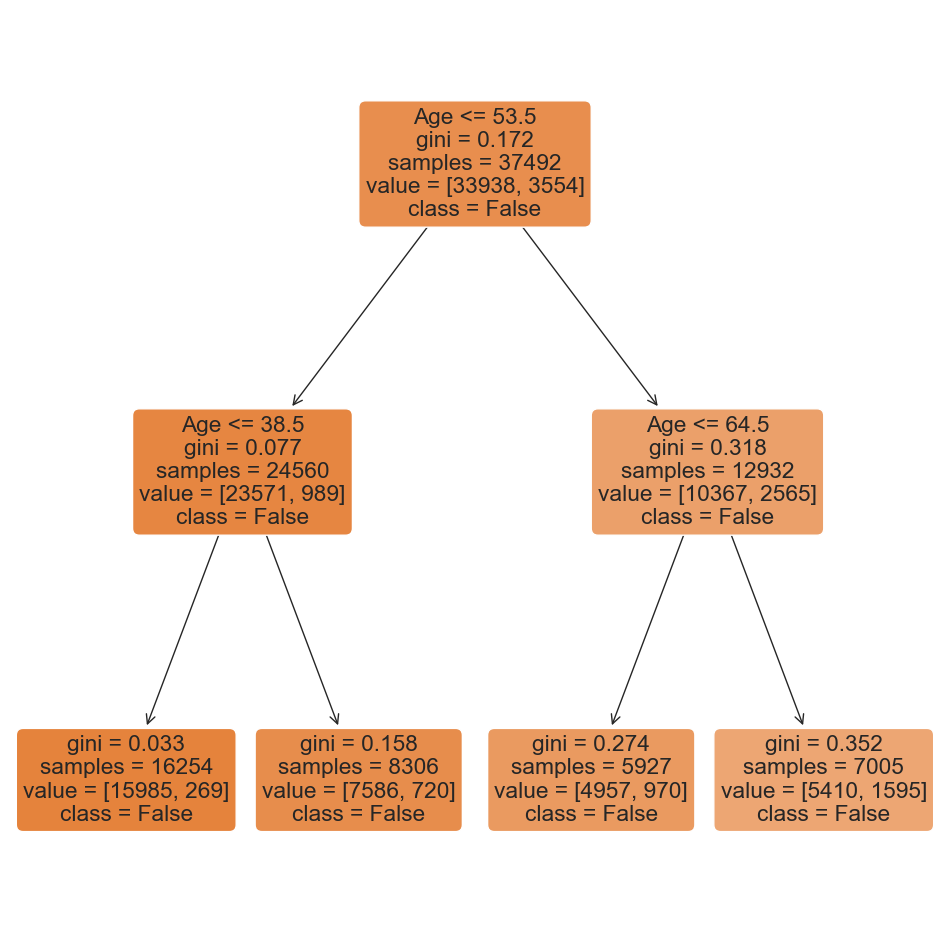

In [250]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data['Age']) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Age"], 
          class_names=["False","True"])

Classification Accuracy 	: 0.9052064440413955


<Axes: >

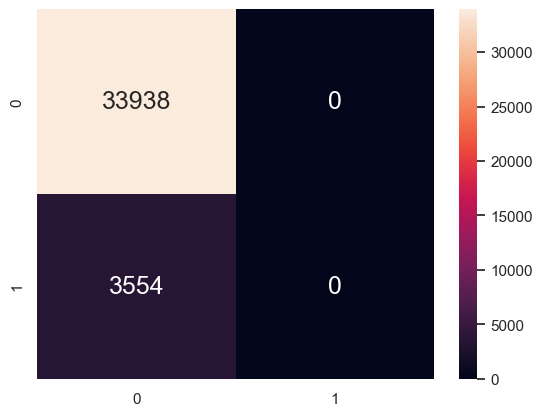

In [251]:
# Predict Diagnosis corresponding to Age Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Comment: Age alone is unable to accurately predict for diagnosis

### BMI

[Text(0.5, 0.8333333333333334, 'BMI <= 28.5\ngini = 0.171\nsamples = 37492\nvalue = [33946, 3546]\nclass = False'),
 Text(0.25, 0.5, 'BMI <= 23.5\ngini = 0.116\nsamples = 26220\nvalue = [24595, 1625]\nclass = False'),
 Text(0.125, 0.16666666666666666, 'gini = 0.054\nsamples = 10312\nvalue = [10024, 288]\nclass = False'),
 Text(0.375, 0.16666666666666666, 'gini = 0.154\nsamples = 15908\nvalue = [14571, 1337]\nclass = False'),
 Text(0.75, 0.5, 'BMI <= 37.5\ngini = 0.283\nsamples = 11272\nvalue = [9351, 1921]\nclass = False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.251\nsamples = 8508\nvalue = [7254, 1254]\nclass = False'),
 Text(0.875, 0.16666666666666666, 'gini = 0.366\nsamples = 2764\nvalue = [2097, 667]\nclass = False')]

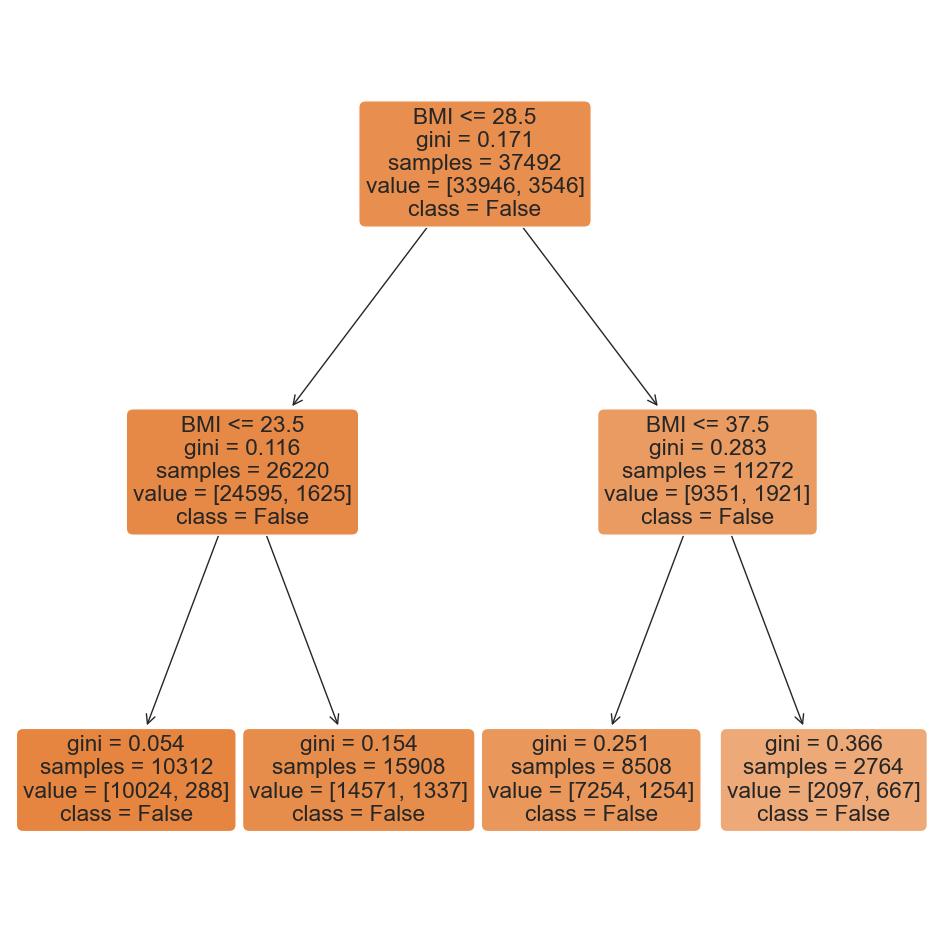

In [252]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data['BMI']) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BMI"], 
          class_names=["False","True"])

Classification Accuracy 	: 0.905419822895551


<Axes: >

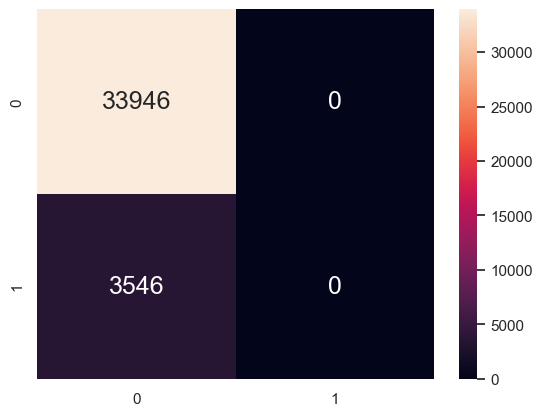

In [253]:
# Predict Diagnosis corresponding to Age Train
X_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Comment: BMI alone is unable to accurately predict for diagnosis

### FBS

[Text(0.5, 0.8333333333333334, 'FBS <= 210.0\ngini = 0.172\nsamples = 37492\nvalue = [33920, 3572]\nclass = False'),
 Text(0.25, 0.5, 'FBS <= 110.0\ngini = 0.114\nsamples = 36098\nvalue = [33911, 2187]\nclass = False'),
 Text(0.125, 0.16666666666666666, 'gini = 0.001\nsamples = 10484\nvalue = [10478, 6]\nclass = False'),
 Text(0.375, 0.16666666666666666, 'gini = 0.156\nsamples = 25614\nvalue = [23433, 2181]\nclass = False'),
 Text(0.75, 0.5, 'FBS <= 290.0\ngini = 0.013\nsamples = 1394\nvalue = [9, 1385]\nclass = True'),
 Text(0.625, 0.16666666666666666, 'gini = 0.016\nsamples = 1104\nvalue = [9, 1095]\nclass = True'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 290\nvalue = [0, 290]\nclass = True')]

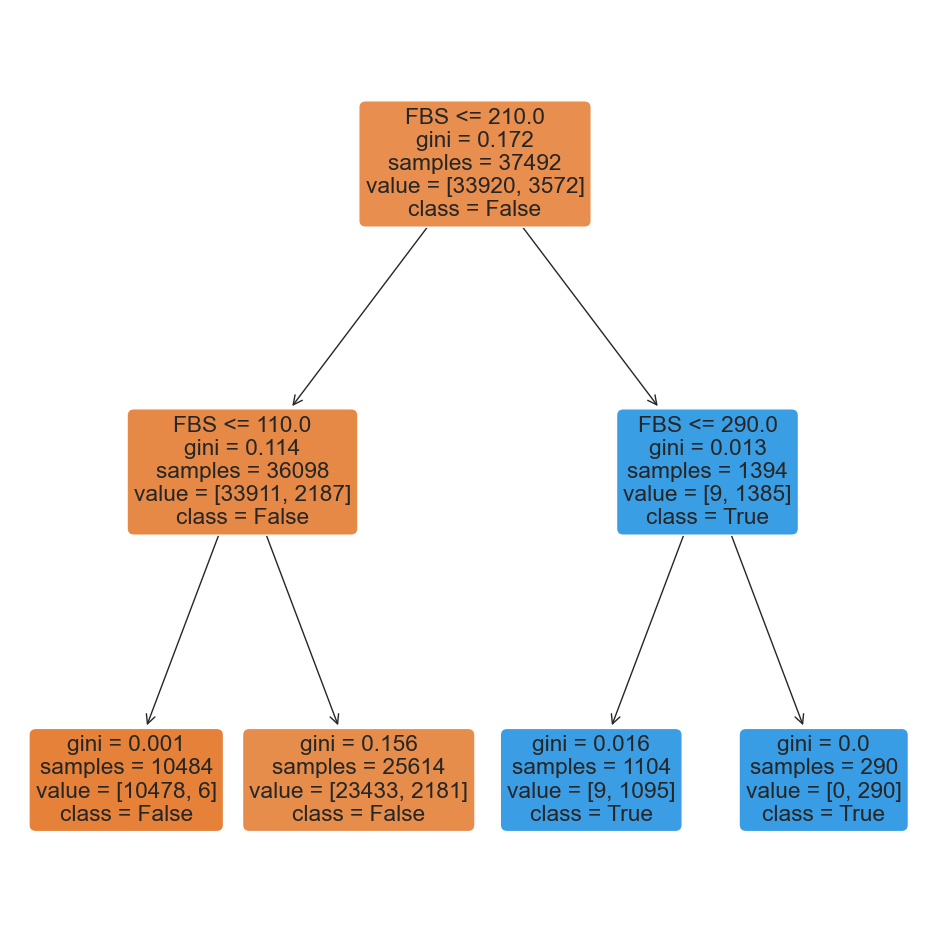

In [52]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data['FBS']) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["FBS"], 
          class_names=["False","True"])

Classification Accuracy 	: 0.9414275045343007


<Axes: >

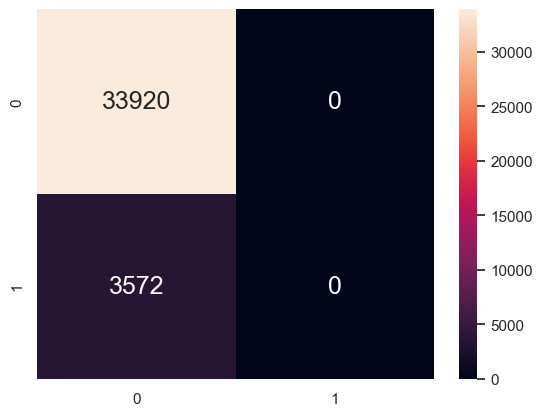

In [53]:
# Predict Diagnosis corresponding to Age Train
X_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Comment: FBS alone is unable to accurately predict for diagnosis

### HbA1c_level

[Text(0.5, 0.8333333333333334, 'HbA1c_level <= 6.7\ngini = 0.173\nsamples = 37492\nvalue = [33905, 3587]\nclass = False'),
 Text(0.25, 0.5, 'HbA1c_level <= 5.35\ngini = 0.101\nsamples = 35783\nvalue = [33874, 1909]\nclass = False'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 13970\nvalue = [13967, 3]\nclass = False'),
 Text(0.375, 0.16666666666666666, 'gini = 0.159\nsamples = 21813\nvalue = [19907, 1906]\nclass = False'),
 Text(0.75, 0.5, 'HbA1c_level <= 9.1\ngini = 0.036\nsamples = 1709\nvalue = [31, 1678]\nclass = True'),
 Text(0.625, 0.16666666666666666, 'gini = 0.018\nsamples = 1693\nvalue = [15, 1678]\nclass = True'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = False')]

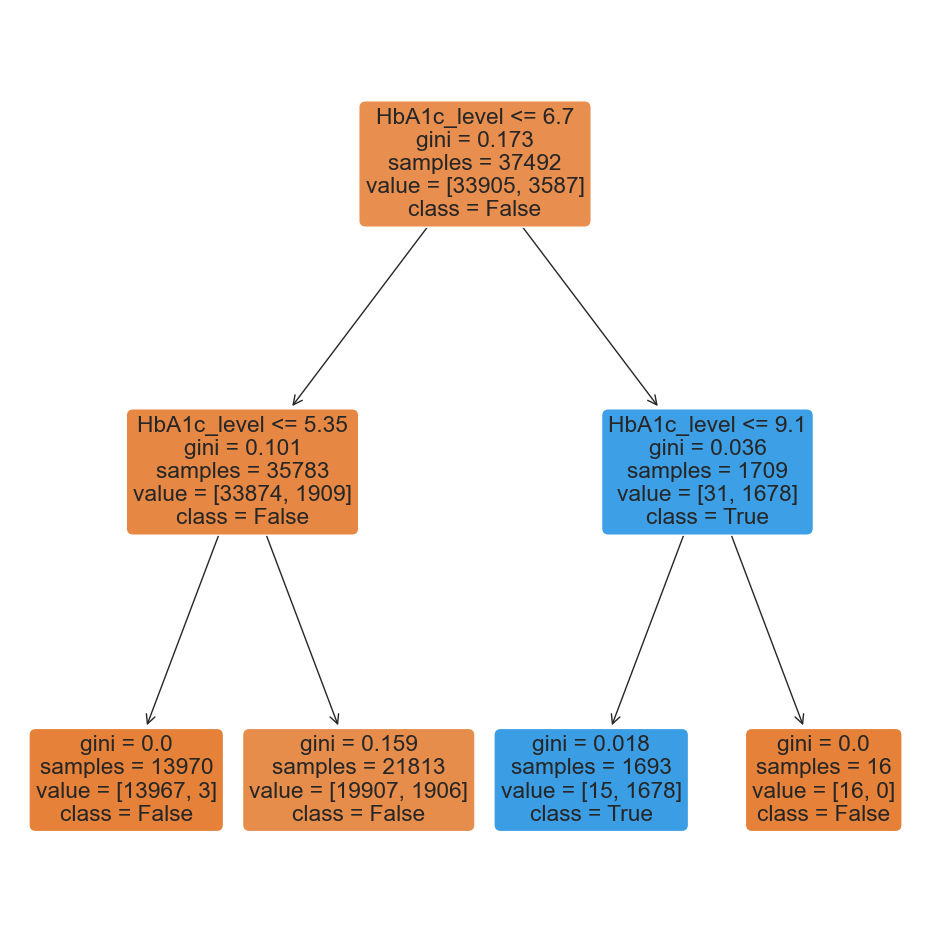

In [54]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data['HbA1c_level']) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["HbA1c_level"], 
          class_names=["False","True"])

Classification Accuracy 	: 0.9486823855755895


<Axes: >

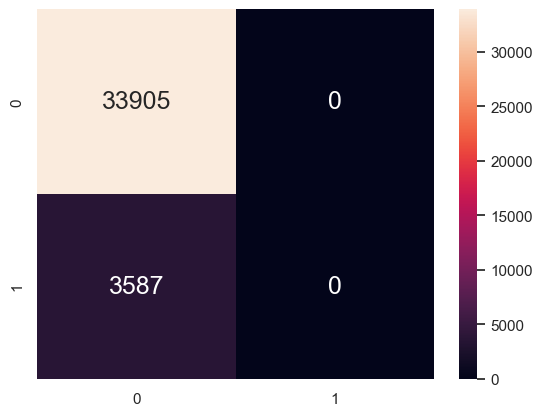

In [55]:
# Predict Diagnosis corresponding to Age Train
X_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Comment: HbA1c_level alone is unable to accurately predict for diagnosis

## Conclusion: All the individual classification tree resulted in 0% true positive. Thus, we concluded that univariate classification is not feasible in our scenario as diabetes depends on multiple variables simultaneously which leads us to creating a multi-variate classification tree

## Multi-variate classification tree

### Max Depth 3

In [56]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Assuming 'sampled_data' is your DataFrame containing data

# Extract Response and Predictors
y = pd.DataFrame(sampled_data['Diagnosis'].astype('category'))
X = pd.DataFrame(sampled_data[["Age", "BMI", "FBS", "HbA1c_level"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)  # create the decision tree object
dectree.fit(X_train, y_train)                  # train the decision tree model

# Convert the classes to strings
class_names = [str(class_name) for class_name in dectree.classes_]

# Print the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dectree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()  # Show the plot



InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Age', 'BMI', 'FBS', 'HbA1c_level'], dtype='object') instead.

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Calculate the confusion matrix for the test dataset
cm_test = confusion_matrix(y_test, y_test_pred)

# Extract true positives (TP) and false negatives (FN) from the confusion matrix
TP = cm_test[1, 1]  # True Positives
FN = cm_test[1, 0]  # False Negatives

# Calculate True Positive Rate (TPR)
TPR = TP / (TP + FN)
print("True Positive Rate (TPR):", TPR)


In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Age", "BMI", "HbA1c_level", "FBS"]

y = pd.DataFrame(sampled_data['Diagnosis'].astype('category'))
X = pd.DataFrame(sampled_data[predictors]) 

### Max Depth 4

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Age", "BMI", "FBS", "HbA1c_level"]

y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Negative","Positive"])

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Extract true positives (TP) and false negatives (FN) from confusion matrix
tp_train = cm_train[1, 1]  # TP for train data
fn_train = cm_train[1, 0]  # FN for train data
tp_test = cm_test[1, 1]    # TP for test data
fn_test = cm_test[1, 0]    # FN for test data

# Calculate true positive rate (TPR)
tpr_train = tp_train / (tp_train + fn_train)
tpr_test = tp_test / (tp_test + fn_test)

print("True Positive Rate (TPR) for Train Data:", tpr_train)
print("True Positive Rate (TPR) for Test Data:", tpr_test)


### For max depth 3 and max depth 4, both train set for the multivariate classification tree has similar TPR(input value)  and classification accuracy(input value).

## Therefore, we believe that max depth 3 tree is a better model in this case.

## Neural Network Model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'sampled_data' is your DataFrame containing data
# Extract Response and Predictors
y = pd.DataFrame(sampled_data['Diagnosis'])
X = pd.DataFrame(sampled_data[["Age", "BMI", "FBS", "HbA1c_level"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()  # Show the plot


## True positive rate for the neural network model is higher compared to the decision tree 
... each rates

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Extract true positives (TP) and false negatives (FN) from confusion matrix
tp_train = cm_train[1, 1]  # TP for train data
fn_train = cm_train[1, 0]  # FN for train data
tp_test = cm_test[1, 1]    # TP for test data
fn_test = cm_test[1, 0]    # FN for test data

# Calculate true positive rate (TPR)
tpr_train = tp_train / (tp_train + fn_train)
tpr_test = tp_test / (tp_test + fn_test)

print("True Positive Rate (TPR) for Train Data:", tpr_train)
print("True Positive Rate (TPR) for Test Data:", tpr_test)


## After analysing our data set, we realised that to detect diabetes, we cannot simply choose a single variable. Detection of diabetes is a complex problem and requires the combination of multiple variables to accurately detect for diabetes.
## We found that the combination of _,_,_and _ has resulted in a ~65% accuracy in checking for diabetes. When testing out the classification tree taught it came out to be similar to the neural network model we explored which has a similar functionality.~~ both result in the same TPR.